# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Datasetin Roboflow'dan import edilmesi

- Reflektörlü yelek ve işyeri kaskının tepiti için bir model eğittim.

In [5]:
%%capture

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="U3MZTTXfE6EzJZako6UU")
project = rf.workspace("ahmet-can-ertekn").project("work-safety")
dataset = project.version(1).download("yolov8")

# Model train

- Notebook incelerken rahat olması açısından epoch bilgilerinin çıktılarını gizledim

In [6]:
%%capture
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

# 50. epoch metric değerleri

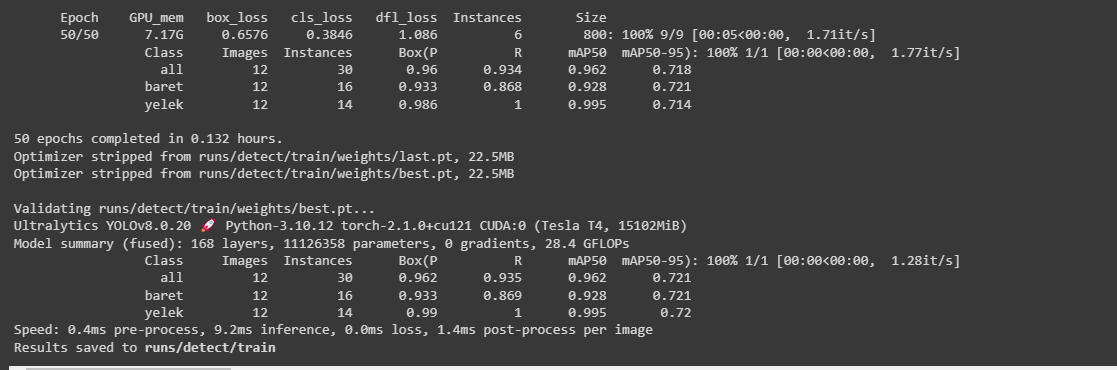

# Confusin Matrix

/content


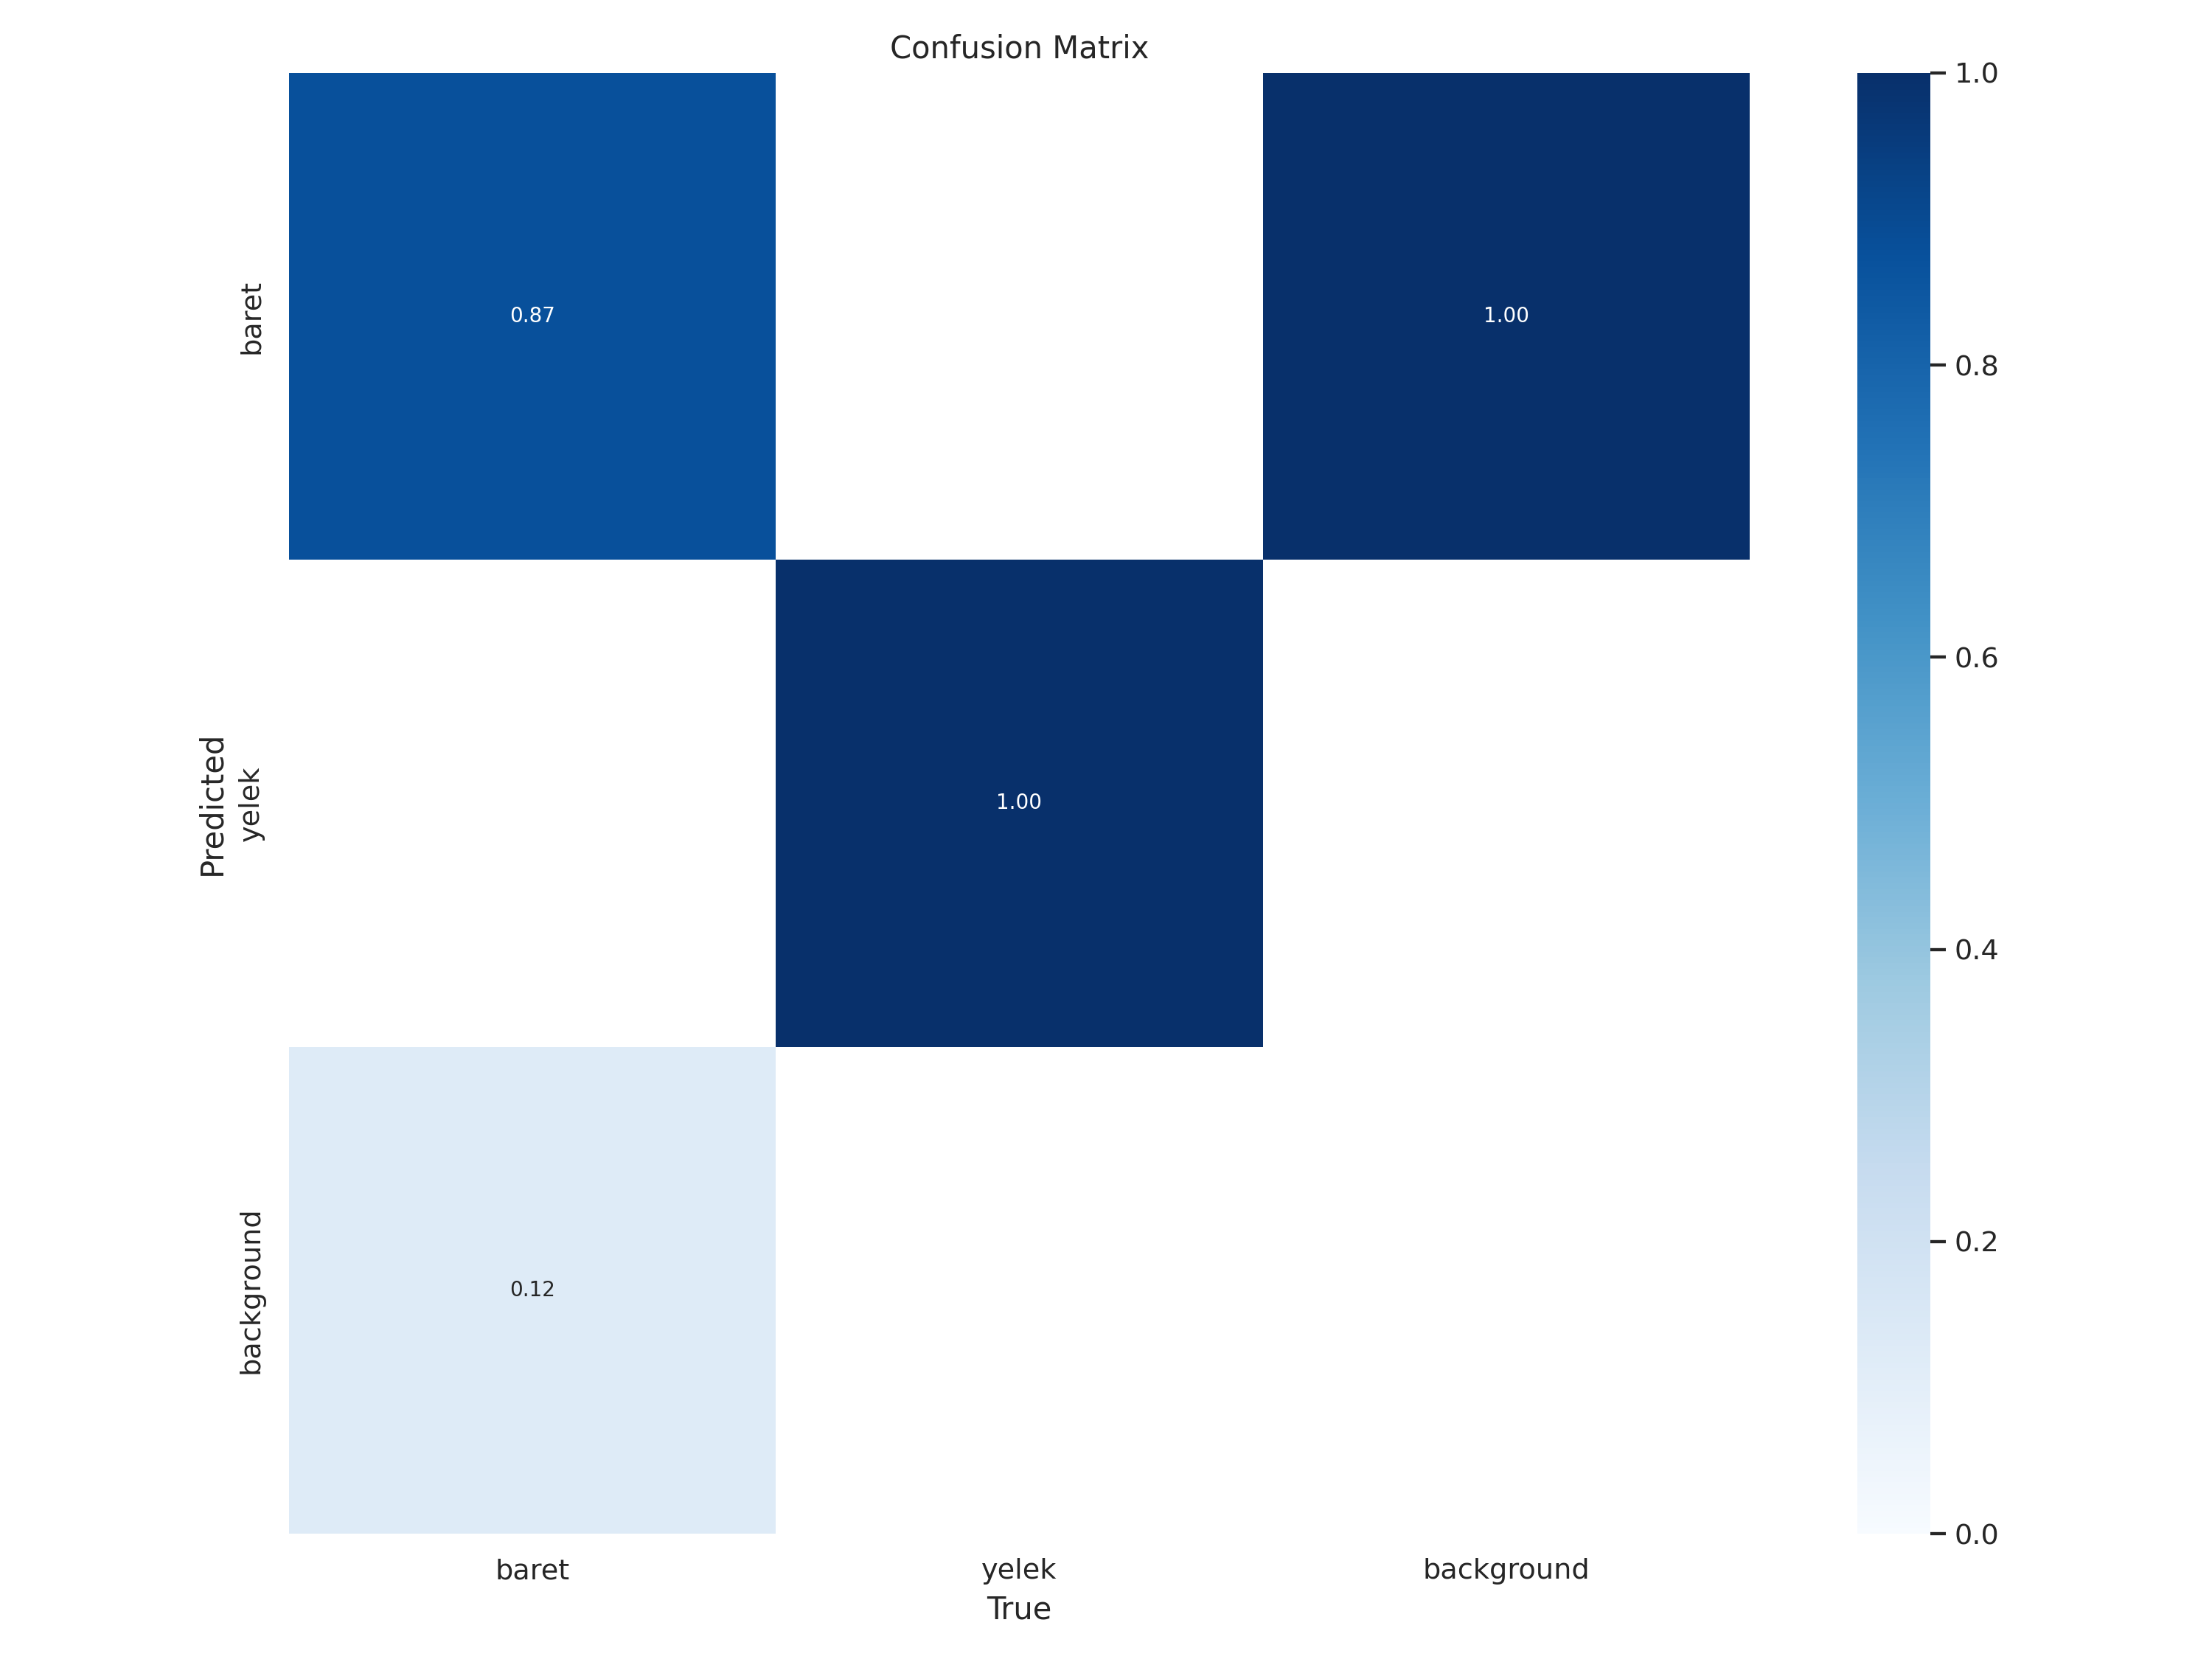

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

# Loss, Precision, Recall, mAP metriklerinin incelenmesi

/content


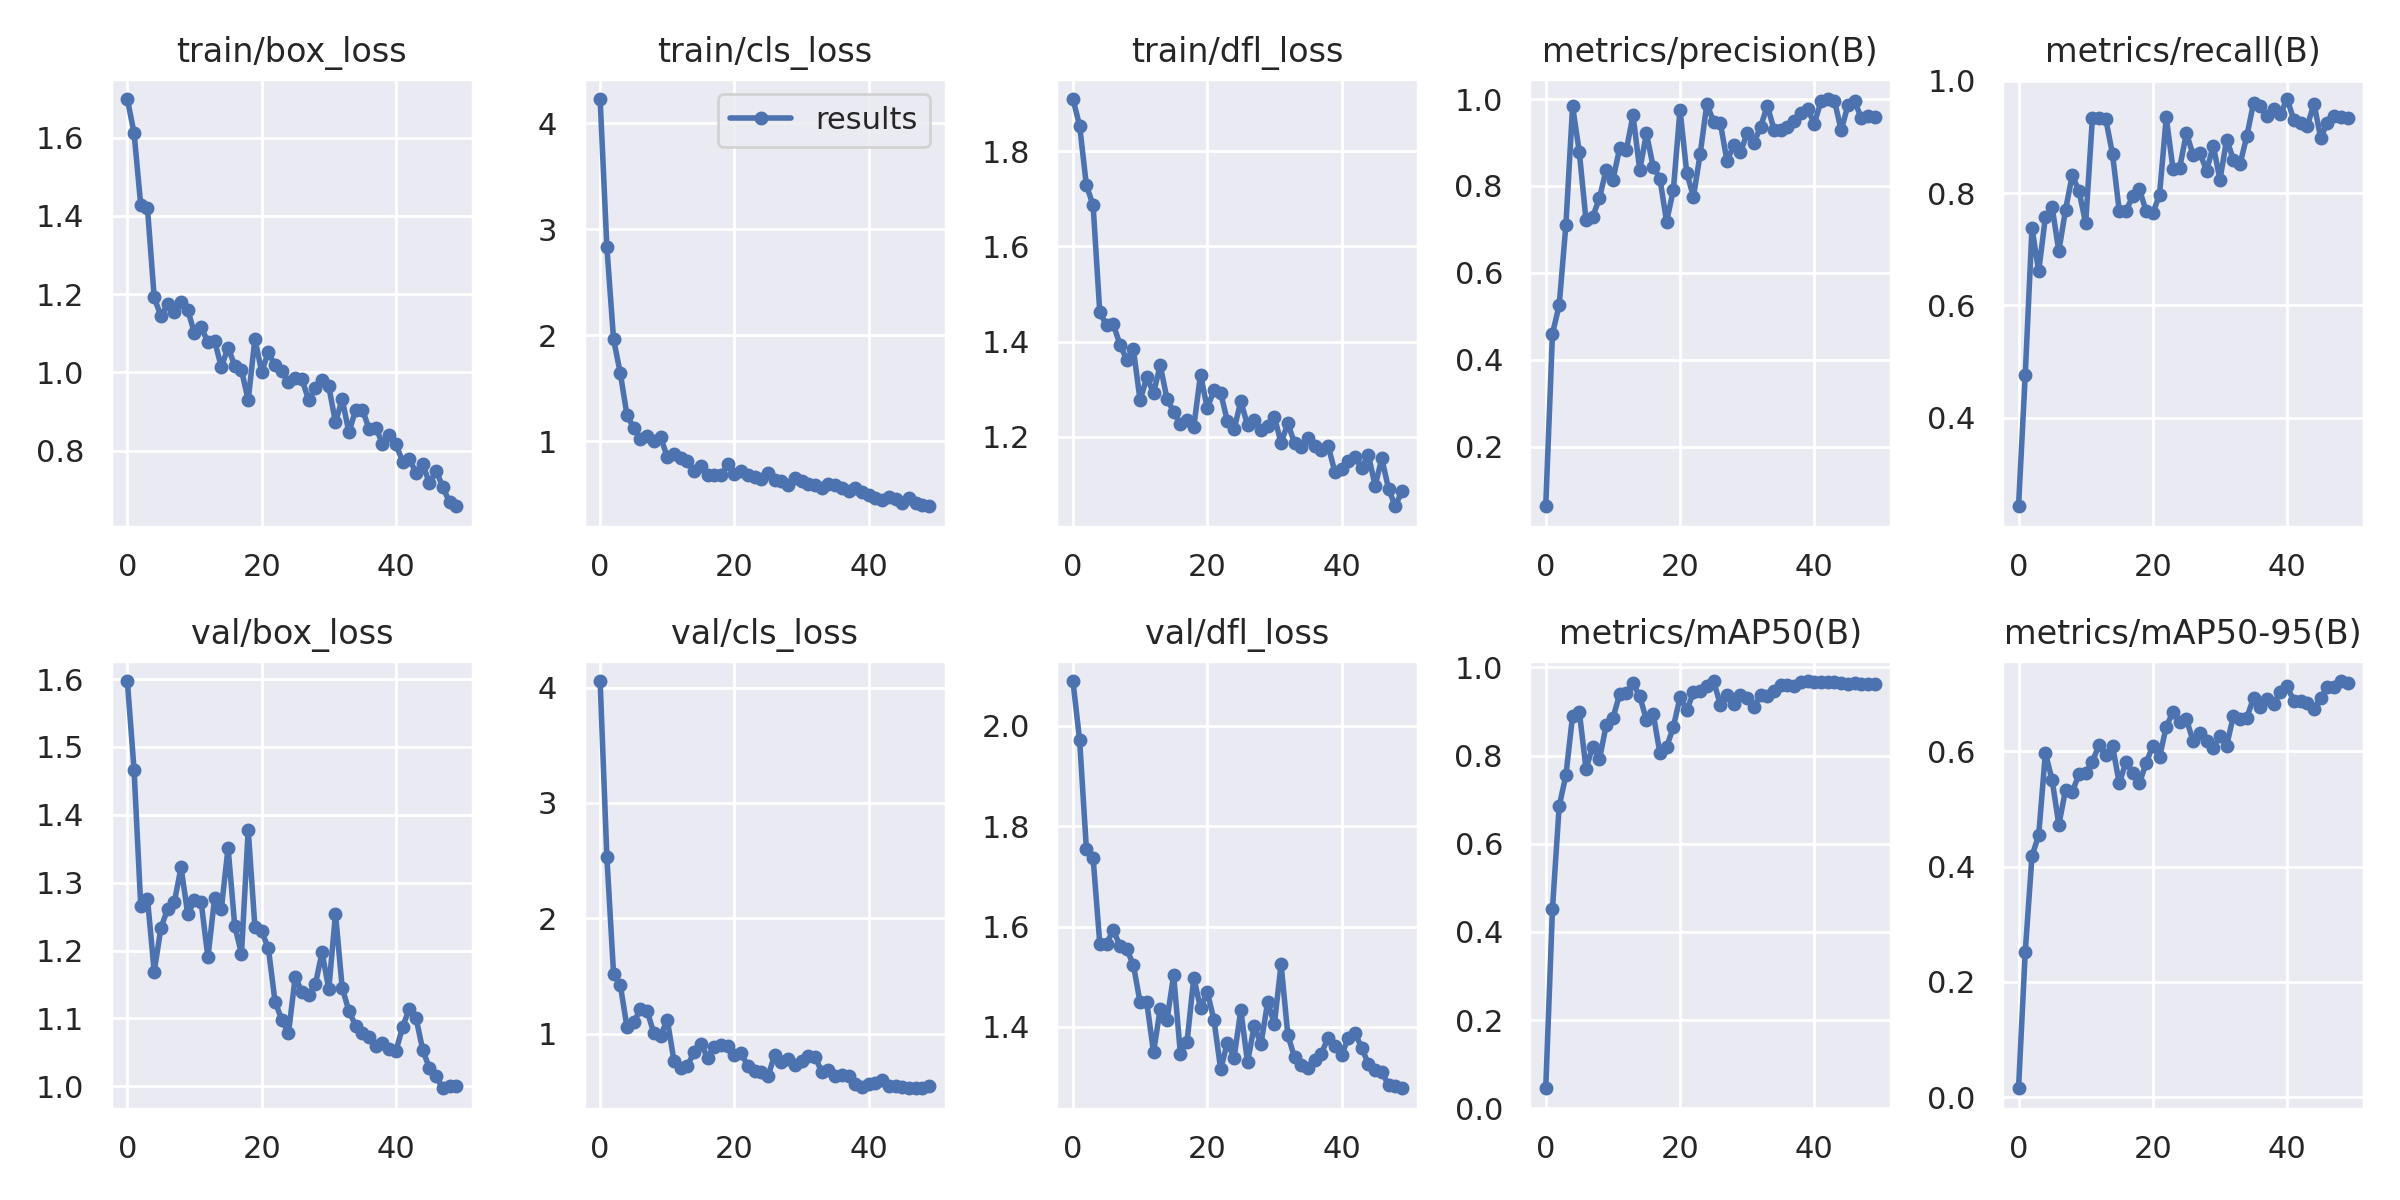

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

# Validasyon setindeki resimlerin predictlerine bakalım

/content


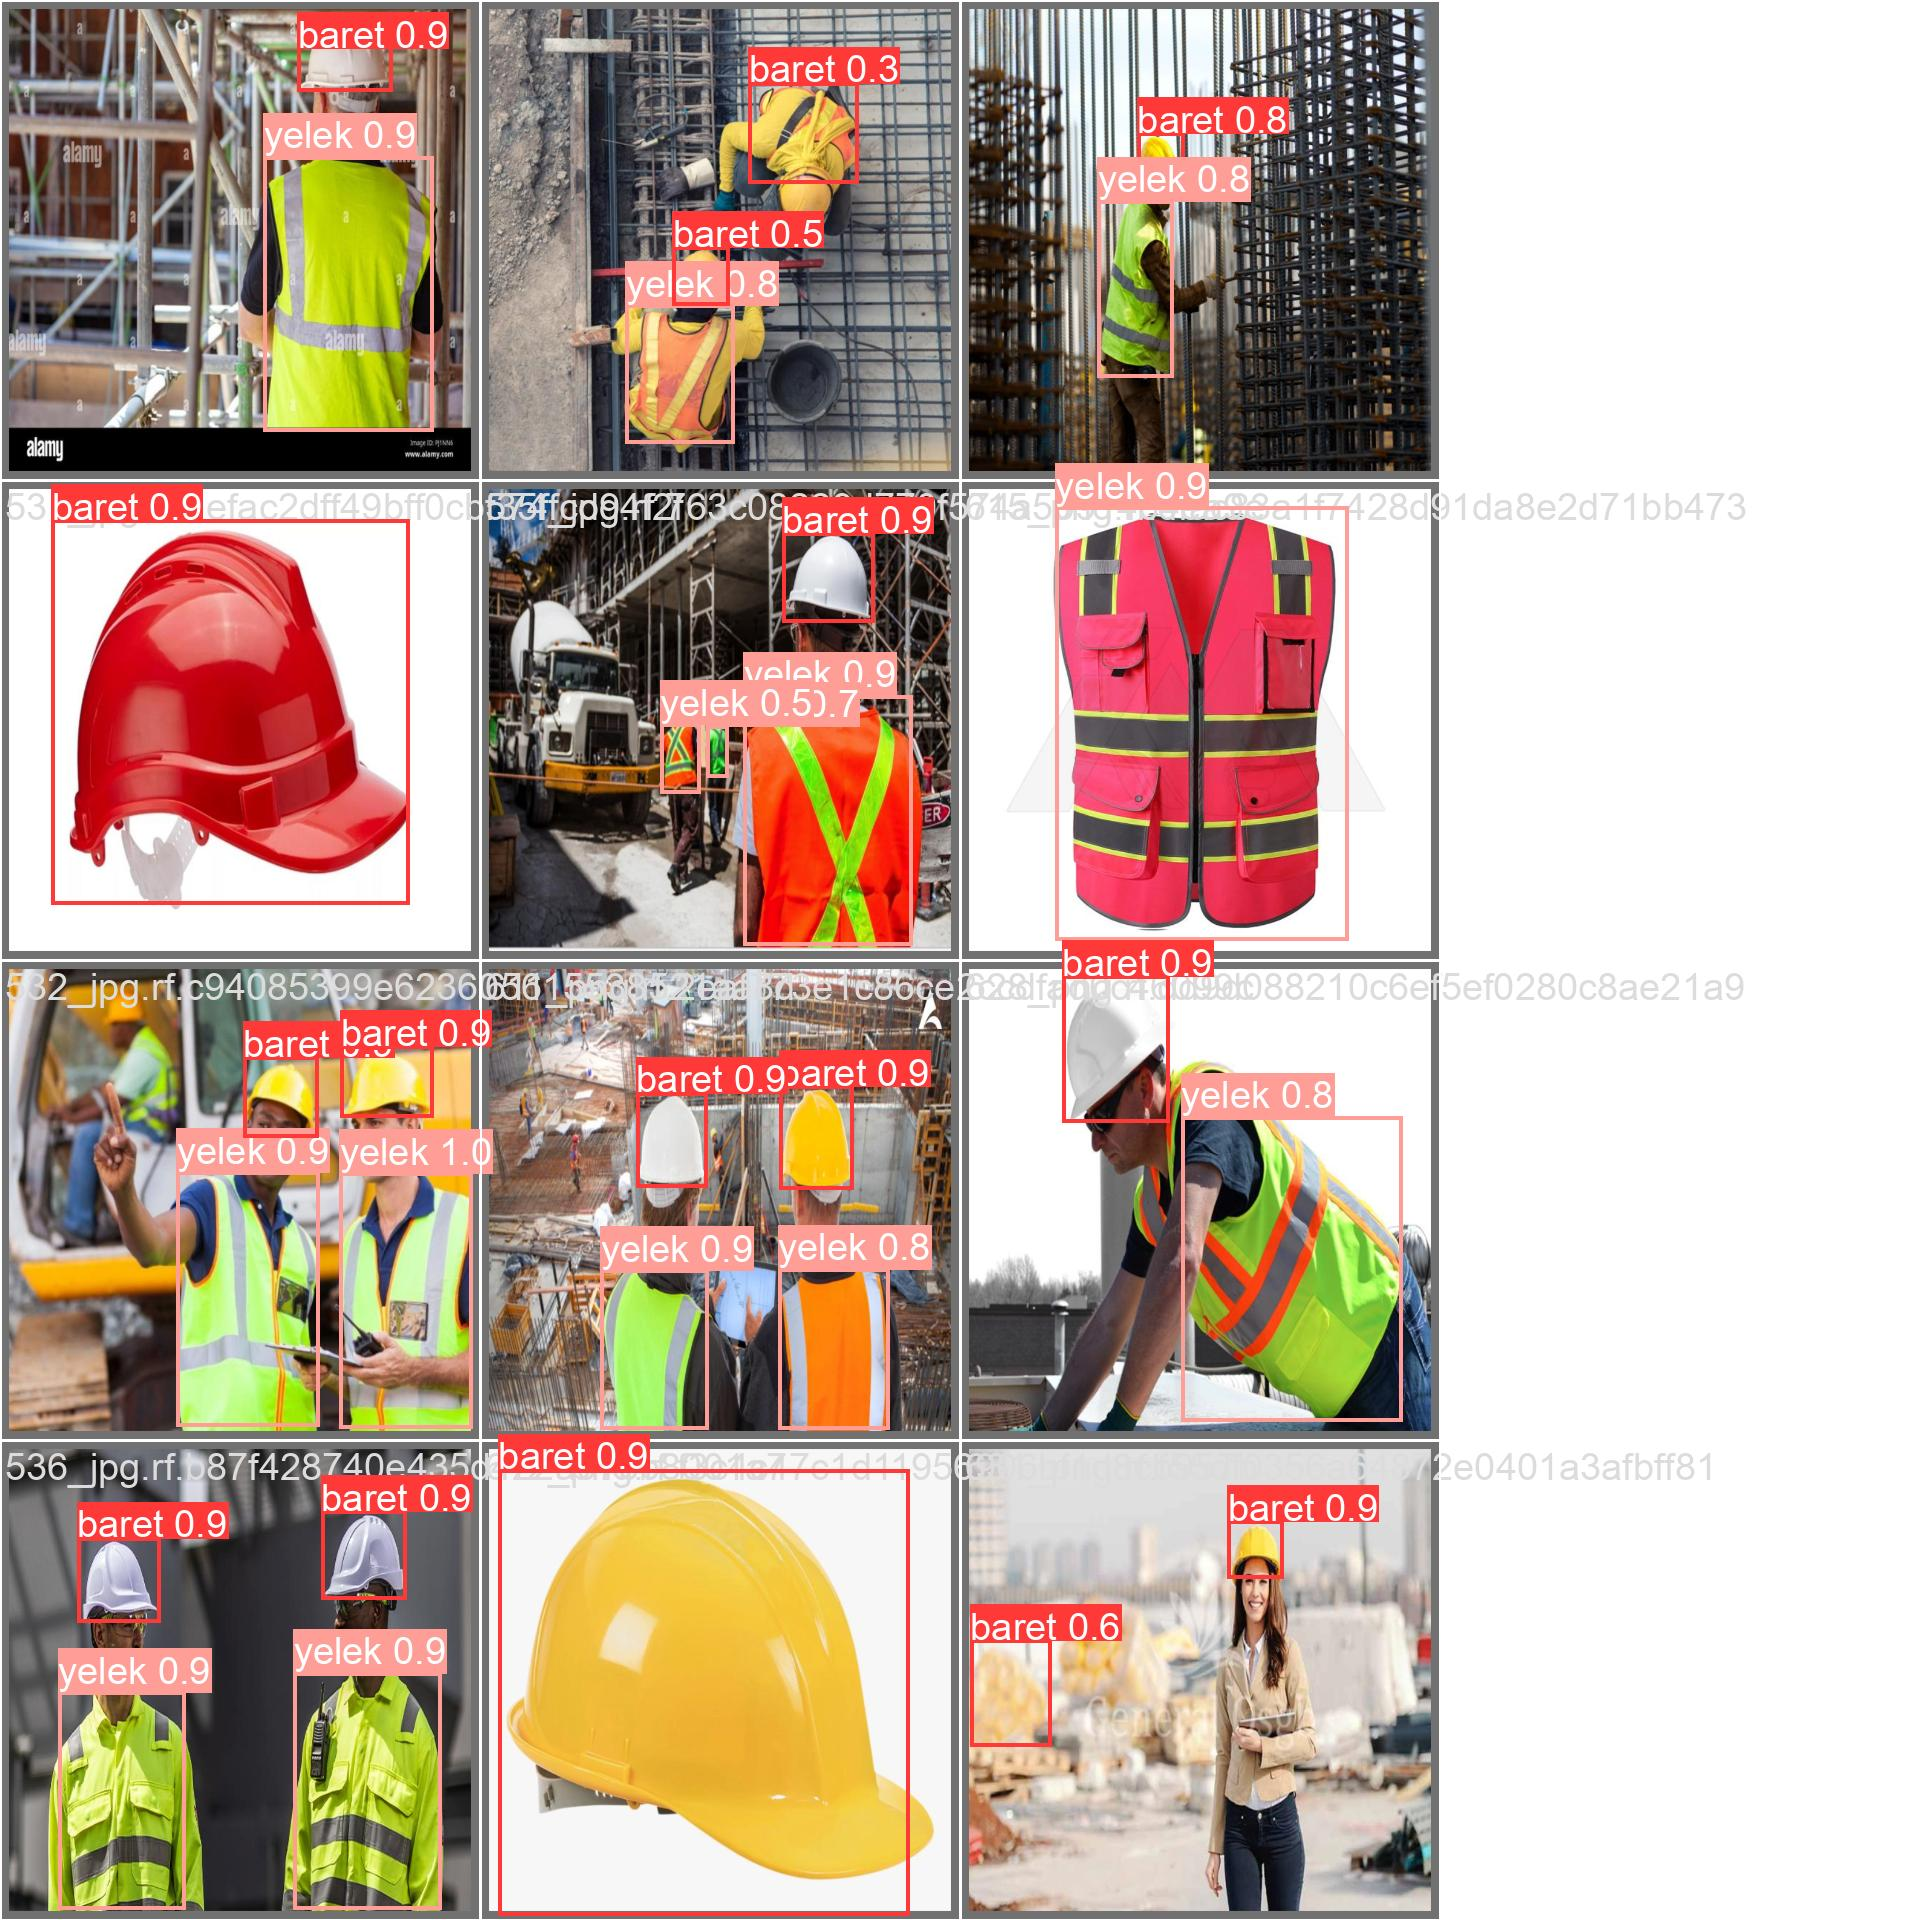

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

# Recall/Precision/F1 metrikleri üzerine değerlendirme

Metrikleri Computer Vision'a bakan yönüyle açıklamak gerekirse:

* **Precision** : **TP / (TP + FP)** > Modelin pozitif olarak tespit ettiği nesnelerin gerçekten pozitif olma olasılığını ölçer.
Bu proje için açıklamak gerekirse: baretin precision skoru **''Baret tespitlerimin yüzde kaçı doğru?''** sorusunun cevabıdır.


* **Precision ne zaman önemli olur ?**
Örnek case: Bir odaya girişte kullanılan Face detection modeli için; içeriye tanımsız bir kişinin girmesini istemeyiz. Bu gibi durumlarda Precision değeri daha önemli hale gelir.


* **Recall** : **TP / (TP + FN)** > Modelin pozitif nesnelerin tüm örneklerini tespit etme yeteneğini gösterir. Bu proje için açıklamak gerekirse: baretin recall skoru **''Baretlerin yüzde kaçını tespit edebildim?''** sorusunun cevabıdır.


* **Recall ne zaman önemli olur ?**
Örnek case: Kanser hücrelerinin tespitinde kullanılan bir model için tüm kanserli hücreleri tespit etmek isteriz. Bu gibi durumlarda recall değeri daha önemli hale gelir.


* **F1** : **(2 * P * R) / (P + R)** > Modelin performansını hem recall hemde precision'ı hesaba katarak daha dengeli bir şekilde değerlendirebiliriz. Recall ve Precision'ın harmonik ortalamasıdır.


# Image url'si ile modelimizden predict alma

In [10]:
model = YOLO(f"{HOME}/runs/detect/train/weights/best.pt")
image_url = "https://c8.alamy.com/comp/DRRBRC/portrait-of-engineer-with-hard-hat-and-yellow-reflective-safety-vest-DRRBRC.jpg"
model(image_url, save = True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
111kB [00:00, 12.3MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[4.41000e+02, 2.00000e+00, 7.38000e+02, 2.21000e+02, 8.72163e-01, 0.00000e+00],
         [2.31000e+02, 3.43000e+02, 8.49000e+02, 1.17400e+03, 8.64957e-01, 1.00000e+00]], device='cuda:0')]

/content


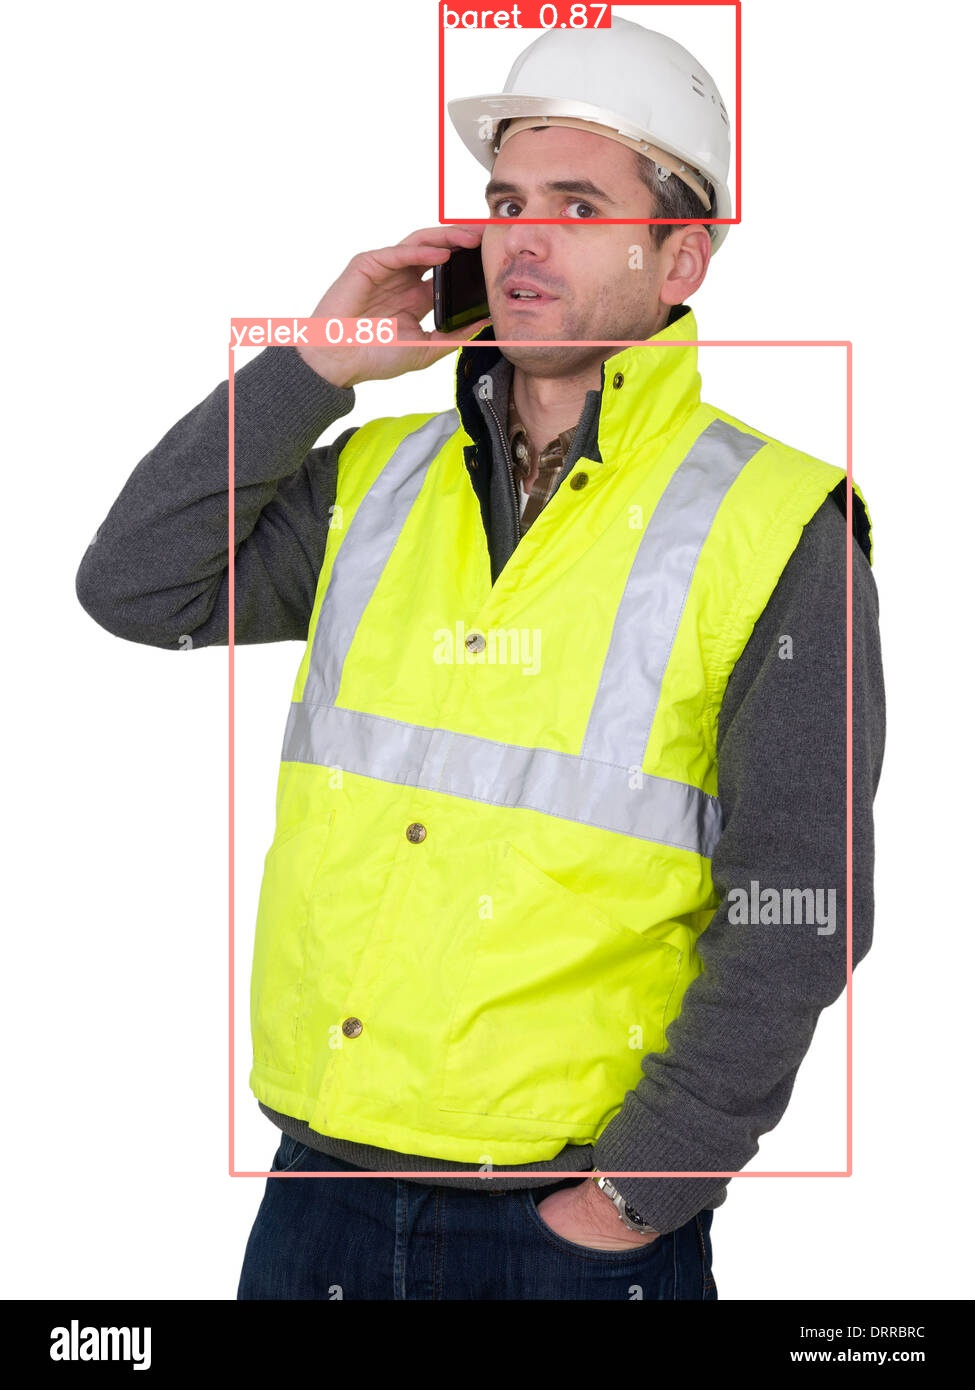

In [13]:
%cd {HOME}
Image(filename=f"{HOME}/runs/detect/predict/portrait-of-engineer-with-hard-hat-and-yellow-reflective-safety-vest-DRRBRC.jpg", width=600)

In [ ]:
# Roboflow'daki projemize modelimizin ağırlıklarını export etmek için
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
